In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np



In [3]:

data = pd.read_csv('realtor-data.csv')


In [4]:
data.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
data.status.value_counts()

for_sale          511379
ready_to_build       780
Name: status, dtype: int64

In [6]:
data.state.value_counts()  ### Interesting...

Massachusetts     175248
Connecticut        89776
New Hampshire      51394
Vermont            46460
Maine              36650
New York           29990
Rhode Island       29596
New Jersey         25662
Puerto Rico        24679
Virgin Islands      2573
Georgia               48
South Carolina        25
Virginia              20
Tennessee             20
Pennsylvania          14
Wyoming                3
West Virginia          1
Name: state, dtype: int64

In [11]:
temp = data.state.value_counts()[:8]

In [13]:
temp.index

Index(['Massachusetts', 'Connecticut', 'New Hampshire', 'Vermont', 'Maine',
       'New York', 'Rhode Island', 'New Jersey'],
      dtype='object')

In [18]:
### Going to remove some outlier points...
data = data[data.state.isin( temp.index ) ]

data.shape


(484776, 12)

In [19]:
data.state.value_counts()

Massachusetts    175248
Connecticut       89776
New Hampshire     51394
Vermont           46460
Maine             36650
New York          29990
Rhode Island      29596
New Jersey        25662
Name: state, dtype: int64

In [7]:
data.zip_code.nunique()

2460

In [20]:
data.city.value_counts() ### New York and New York City are same thing...


Boston            31502
New York City      6835
New York           5158
Hartford           4496
Providence         4223
                  ...  
Dyker Heights         1
Allagash              1
Sangerville           1
Atlantique            1
Wyman Township        1
Name: city, Length: 1666, dtype: int64

In [22]:
### Change these to NYC
data.city[data.city=='New York'] = 'New York City'

In [23]:
data.city.value_counts()

Boston                 31502
New York City          11993
Hartford                4496
Providence              4223
Springfield             4125
                       ...  
Glenwood Plt               1
T8 R7 Wels                 1
T6 R1 Nbpp                 1
Big Moose Township         1
Herseytown Township        1
Name: city, Length: 1665, dtype: int64

In [24]:
data.status.value_counts()

for_sale          483996
ready_to_build       780
Name: status, dtype: int64

In [27]:
### Let's get rid of the 'ready_to_build' entries!

data = data[data.status == 'for_sale']

data.shape

(483996, 12)

<AxesSubplot:>

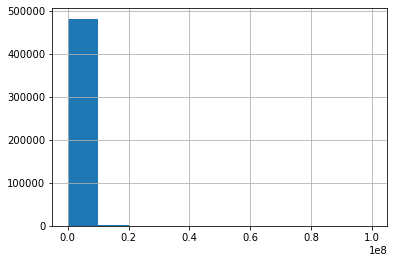

In [28]:
data.price.hist() ### Not too helpful

<AxesSubplot:xlabel='price'>

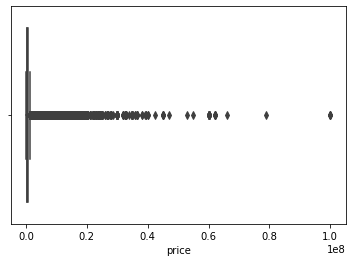

In [33]:
sns.boxplot( x=data.price )

In [34]:
max(data.price)

100000000.0

In [36]:
data[data.price==max(data.price)]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
459320,for_sale,100000000.0,10.0,10.0,60.92,"19 Great Is, Darien, CT, 06820",19 Great Is,Darien,Connecticut,6820.0,13107.0,NaN
459321,for_sale,100000000.0,10.0,10.0,60.92,"Great Is, Darien, CT, 06820",Great Is,Darien,Connecticut,6820.0,13107.0,NaN
463024,for_sale,100000000.0,10.0,10.0,60.92,"Great Is, Darien, CT, 06820",Great Is,Darien,Connecticut,6820.0,13107.0,NaN
463025,for_sale,100000000.0,10.0,10.0,60.92,"19 Great Is, Darien, CT, 06820",19 Great Is,Darien,Connecticut,6820.0,13107.0,NaN


In [37]:
data.bed.value_counts()

3.0     133868
2.0      85403
4.0      78466
5.0      27061
1.0      26745
6.0      18014
7.0       5908
8.0       5417
9.0       3766
10.0      1639
12.0      1385
11.0       857
15.0       299
14.0       219
13.0       215
18.0       162
16.0       154
20.0       142
19.0       116
17.0        88
24.0        83
22.0        50
28.0        49
42.0        28
60.0        27
21.0        27
99.0        23
86.0        21
32.0        21
31.0        18
27.0        13
33.0        10
49.0         8
46.0         6
23.0         3
40.0         3
29.0         3
30.0         1
68.0         1
36.0         1
Name: bed, dtype: int64

<AxesSubplot:>

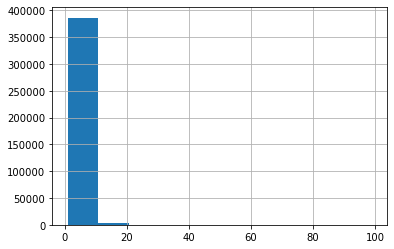

In [38]:
data.bed.hist()

In [40]:
data[data.bed>15]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
25063,for_sale,900000.0,24.0,9.0,0.13,"48 West St, Chicopee, MA, 01013",48 West St,Chicopee,Massachusetts,1013.0,9999.0,NaN
25113,for_sale,1500000.0,28.0,16.0,0.13,"393-399 Main St, Holyoke, MA, 01040",393-399 Main St,Holyoke,Massachusetts,1040.0,9999.0,NaN
27944,for_sale,900000.0,24.0,9.0,0.13,"48 West St, Chicopee, MA, 01013",48 West St,Chicopee,Massachusetts,1013.0,9999.0,NaN
28372,for_sale,697000.0,18.0,12.0,0.29,"20/28 Wallace/Brown Pl Unit 12, Pittsfield, MA...",20/28 Wallace/Brown Pl Unit 12,Pittsfield,Massachusetts,1201.0,8428.0,NaN
28895,for_sale,239000.0,20.0,18.0,0.71,"1307 North St, Pittsfield, MA, 01201",1307 North St,Pittsfield,Massachusetts,1201.0,15096.0,2010-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...
510130,for_sale,15000000.0,68.0,28.0,NaN,"1721 E 8th St Unit 27UNITS, New York City, NY,...",1721 E 8th St Unit 27UNITS,New York City,New York,11223.0,20700.0,NaN
511392,for_sale,23900000.0,24.0,19.0,NaN,"27-29 W 69th St, New York, NY, 10023",27-29 W 69th St,New York City,New York,10023.0,NaN,NaN
511635,for_sale,2590000.0,18.0,6.0,0.07,"468 Ralph Ave, Crown Heights, NY, 11233",468 Ralph Ave,Crown Heights,New York,11233.0,5627.0,NaN
511907,for_sale,12900000.0,20.0,NaN,0.11,"399 Flatbush Ave, New York City, NY, 11238",399 Flatbush Ave,New York City,New York,11238.0,31255.0,NaN


<AxesSubplot:xlabel='bed', ylabel='price'>

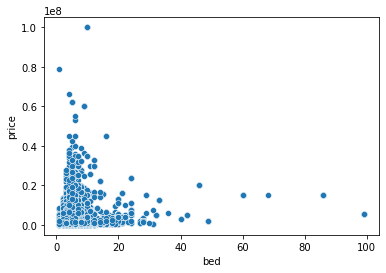

In [43]:
sns.scatterplot( x='bed', y='price', data=data)

In [45]:
data = data[data.bed <= 15]

Text(0.5, 1.0, 'Histogram of # of Beds')

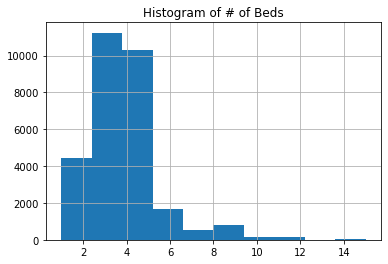

In [187]:
data.bed.hist()
plt.title('Histogram of # of Beds')

<AxesSubplot:xlabel='bed', ylabel='bath'>

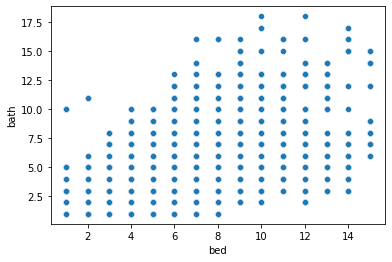

In [47]:
sns.scatterplot( x='bed', y='bath', data=data)

In [49]:
data.bath.value_counts()

2.0     146429
3.0      99334
1.0      79932
4.0      35223
5.0      13337
6.0       6419
7.0       2782
8.0       2127
9.0       1004
10.0       675
11.0       307
12.0       257
13.0       177
15.0        85
14.0        38
16.0        36
17.0         5
18.0         2
Name: bath, dtype: int64

<AxesSubplot:>

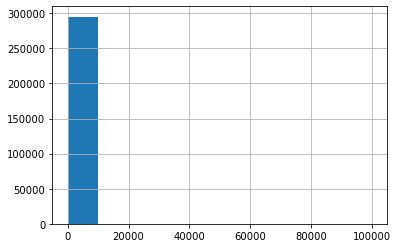

In [50]:
data.acre_lot.hist()

<AxesSubplot:xlabel='acre_lot'>

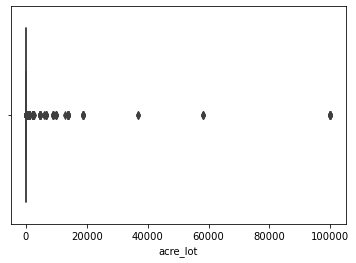

In [55]:
sns.boxplot( x=data.acre_lot )



In [57]:
data.nlargest(20, 'acre_lot')

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
348494,for_sale,129000.0,2.0,1.0,100000.00,"2 Pike St, Whitehall, NY, 12887",2 Pike St,Whitehall,New York,12887.0,1352.0,NaN
367295,for_sale,129000.0,2.0,1.0,100000.00,"2 Pike St, Whitehall, NY, 12887",2 Pike St,Whitehall,New York,12887.0,1352.0,NaN
370731,for_sale,129000.0,2.0,1.0,100000.00,"2 Pike St, Whitehall, NY, 12887",2 Pike St,Whitehall,New York,12887.0,1352.0,NaN
371682,for_sale,129000.0,2.0,1.0,100000.00,"2 Pike St, Whitehall, NY, 12887",2 Pike St,Whitehall,New York,12887.0,1352.0,NaN
372810,for_sale,129000.0,2.0,1.0,100000.00,"2 Pike St, Whitehall, NY, 12887",2 Pike St,Whitehall,New York,12887.0,1352.0,NaN
376972,for_sale,129000.0,2.0,1.0,100000.00,"2 Pike St, Whitehall, NY, 12887",2 Pike St,Whitehall,New York,12887.0,1352.0,NaN
475692,for_sale,485000.0,4.0,3.0,100000.00,"364 Farley Ave, Scotch Plains, NJ, 07076",364 Farley Ave,Scotch Plains,New Jersey,7076.0,NaN,1974-11-08
476249,for_sale,485000.0,4.0,3.0,100000.00,"364 Farley Ave, Scotch Plains, NJ, 07076",364 Farley Ave,Scotch Plains,New Jersey,7076.0,NaN,1974-11-08
501476,for_sale,485000.0,4.0,3.0,100000.00,"364 Farley Ave, Scotch Plains, NJ, 07076",364 Farley Ave,Scotch Plains,New Jersey,7076.0,NaN,1974-11-08
508349,for_sale,485000.0,4.0,3.0,100000.00,"364 Farley Ave, Scotch Plains, NJ, 07076",364 Farley Ave,Scotch Plains,New Jersey,7076.0,NaN,1974-11-08


<AxesSubplot:xlabel='house_size'>

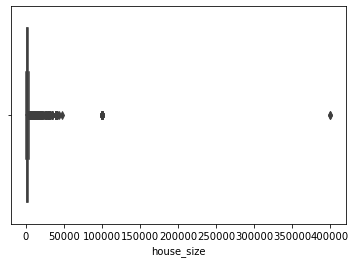

In [59]:
sns.boxplot( x = data.house_size )

In [60]:
data.nlargest( 20, 'house_size' ) ### These values of house_size look erroneous!


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
475143,for_sale,489999.0,6.0,3.0,0.1,"814 Cleveland Ave Unit 2, Linden, NJ, 07036",814 Cleveland Ave Unit 2,Linden,New Jersey,7036.0,400149.0,NaN
479983,for_sale,489999.0,6.0,3.0,0.1,"814 Cleveland Ave Unit 2, Linden, NJ, 07036",814 Cleveland Ave Unit 2,Linden,New Jersey,7036.0,400149.0,NaN
114959,for_sale,309900.0,3.0,2.0,NaN,"28 Adelaide Ave Unit 28, Methuen, MA, 01844",28 Adelaide Ave Unit 28,Methuen,Massachusetts,1844.0,99999.0,2022-01-12
115934,for_sale,309900.0,3.0,2.0,NaN,"28 Adelaide Ave Unit 28, Methuen, MA, 01844",28 Adelaide Ave Unit 28,Methuen,Massachusetts,1844.0,99999.0,2022-01-12
116739,for_sale,309900.0,3.0,2.0,NaN,"28 Adelaide Ave Unit 28, Methuen, MA, 01844",28 Adelaide Ave Unit 28,Methuen,Massachusetts,1844.0,99999.0,2022-01-12
117287,for_sale,309900.0,3.0,2.0,NaN,"28 Adelaide Ave Unit 28, Methuen, MA, 01844",28 Adelaide Ave Unit 28,Methuen,Massachusetts,1844.0,99999.0,2022-01-12
117913,for_sale,309900.0,3.0,2.0,NaN,"28 Adelaide Ave Unit 28, Methuen, MA, 01844",28 Adelaide Ave Unit 28,Methuen,Massachusetts,1844.0,99999.0,2022-01-12
118501,for_sale,309900.0,3.0,2.0,NaN,"28 Adelaide Ave Unit 28, Methuen, MA, 01844",28 Adelaide Ave Unit 28,Methuen,Massachusetts,1844.0,99999.0,2022-01-12
119130,for_sale,309900.0,3.0,2.0,NaN,"28 Adelaide Ave Unit 28, Methuen, MA, 01844",28 Adelaide Ave Unit 28,Methuen,Massachusetts,1844.0,99999.0,2022-01-12
119426,for_sale,309900.0,3.0,2.0,NaN,"28 Adelaide Ave Unit 28, Methuen, MA, 01844",28 Adelaide Ave Unit 28,Methuen,Massachusetts,1844.0,99999.0,2022-01-12


In [62]:
data = data[data.house_size < 99999]

In [63]:
data.nlargest( 10, 'house_size')

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
466015,for_sale,1398000.0,4.0,3.0,1.10,"150 Leroy St, Tenafly, NJ, 07670",150 Leroy St,Tenafly,New Jersey,7670.0,47916.0,NaN
472774,for_sale,699000.0,3.0,2.0,0.99,"20 Sherman Ave, Hawthorne, NJ, 07506",20 Sherman Ave,Hawthorne,New Jersey,7506.0,43359.0,NaN
468054,for_sale,638500.0,2.0,2.0,0.95,"460 Lafayette Ave, Wyckoff, NJ, 07481",460 Lafayette Ave,Wyckoff,New Jersey,7481.0,41182.0,NaN
473425,for_sale,638500.0,2.0,2.0,0.95,"460 Lafayette Ave, Wyckoff, NJ, 07481",460 Lafayette Ave,Wyckoff,New Jersey,7481.0,41182.0,NaN
504292,for_sale,638500.0,2.0,2.0,0.95,"460 Lafayette Ave, Wyckoff, NJ, 07481",460 Lafayette Ave,Wyckoff,New Jersey,7481.0,41182.0,NaN
466559,for_sale,389000.0,1.0,1.0,0.27,"720 W 173rd St Apt 5, New York, NY, 10032",720 W 173rd St Apt 5,New York City,New York,10032.0,40720.0,2017-10-25
483324,for_sale,389000.0,1.0,1.0,0.27,"720 W 173rd St Apt 5, New York, NY, 10032",720 W 173rd St Apt 5,New York City,New York,10032.0,40720.0,2017-10-25
489243,for_sale,389000.0,1.0,1.0,0.27,"720 W 173rd St Apt 5, New York, NY, 10032",720 W 173rd St Apt 5,New York City,New York,10032.0,40720.0,2017-10-25
502647,for_sale,389000.0,1.0,1.0,0.27,"720 W 173rd St Apt 5, New York, NY, 10032",720 W 173rd St Apt 5,New York City,New York,10032.0,40720.0,2017-10-25
509595,for_sale,389000.0,1.0,1.0,0.27,"720 W 173rd St Apt 5, New York, NY, 10032",720 W 173rd St Apt 5,New York City,New York,10032.0,40720.0,2017-10-25


In [64]:
data['price_sf'] = data['price'] / data['house_size']

In [65]:
data.nlargest( 20, 'price_sf' )

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf
198800,for_sale,8650000.0,1.0,1.0,0.27,"109 N Water St, Edgartown, MA, 02539",109 N Water St,Edgartown,Massachusetts,2539.0,882.0,NaN,9807.256236
470821,for_sale,26500000.0,3.0,4.0,NaN,"15 Central Park W Apt 34C, New York, NY, 10023",15 Central Park W Apt 34C,New York City,New York,10023.0,2761.0,2008-01-28,9597.971749
487768,for_sale,26500000.0,3.0,4.0,NaN,"15 Central Park W Apt 34C, New York, NY, 10023",15 Central Park W Apt 34C,New York City,New York,10023.0,2761.0,2008-01-28,9597.971749
507528,for_sale,26500000.0,3.0,4.0,NaN,"15 Central Park W Apt 34C, New York, NY, 10023",15 Central Park W Apt 34C,New York City,New York,10023.0,2761.0,2008-01-28,9597.971749
465916,for_sale,66000000.0,4.0,6.0,NaN,"111 W 57th St Ph 72, New York, NY, 10019",111 W 57th St Ph 72,New York City,New York,10019.0,7130.0,NaN,9256.661992
477499,for_sale,16500000.0,8.0,8.0,NaN,"18 Mercer St, New York, NY, 10013",18 Mercer St,New York City,New York,10013.0,1785.0,NaN,9243.697479
486627,for_sale,62000000.0,5.0,6.0,NaN,"23 E 22nd St Unit Ph, New York City, NY, 10010",23 E 22nd St Unit Ph,New York City,New York,10010.0,6850.0,NaN,9051.094891
491960,for_sale,62000000.0,5.0,6.0,NaN,"23 E 22nd St Unit Ph, New York City, NY, 10010",23 E 22nd St Unit Ph,New York City,New York,10010.0,6850.0,NaN,9051.094891
492006,for_sale,62000000.0,5.0,6.0,NaN,"23 E 22nd St Unit Ph, New York, NY, 10010",23 E 22nd St Unit Ph,New York City,New York,10010.0,6850.0,NaN,9051.094891
505661,for_sale,62000000.0,5.0,6.0,NaN,"23 E 22nd St Unit Ph, New York City, NY, 10010",23 E 22nd St Unit Ph,New York City,New York,10010.0,6850.0,NaN,9051.094891


In [67]:
data.nsmallest( 20, 'price_sf')

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf
92497,for_sale,10000.0,4.0,2.0,8.80,"461 West St, Wrentham, MA, 02093",461 West St,Wrentham,Massachusetts,2093.0,3281.0,2003-12-24,3.047851
95801,for_sale,10000.0,4.0,2.0,8.80,"461 West St, Wrentham, MA, 02093",461 West St,Wrentham,Massachusetts,2093.0,3281.0,2003-12-24,3.047851
101338,for_sale,10000.0,4.0,2.0,8.80,"461 West St, Wrentham, MA, 02093",461 West St,Wrentham,Massachusetts,2093.0,3281.0,2003-12-24,3.047851
102382,for_sale,10000.0,4.0,2.0,8.80,"461 West St, Wrentham, MA, 02093",461 West St,Wrentham,Massachusetts,2093.0,3281.0,2003-12-24,3.047851
112242,for_sale,10000.0,4.0,2.0,8.80,"461 West St, Wrentham, MA, 02093",461 West St,Wrentham,Massachusetts,2093.0,3281.0,2003-12-24,3.047851
114280,for_sale,10000.0,4.0,2.0,8.80,"461 West St, Wrentham, MA, 02093",461 West St,Wrentham,Massachusetts,2093.0,3281.0,2003-12-24,3.047851
135594,for_sale,10000.0,4.0,2.0,8.80,"461 West St, Wrentham, MA, 02093",461 West St,Wrentham,Massachusetts,2093.0,3281.0,2003-12-24,3.047851
137576,for_sale,10000.0,4.0,2.0,8.80,"461 West St, Wrentham, MA, 02093",461 West St,Wrentham,Massachusetts,2093.0,3281.0,2003-12-24,3.047851
139284,for_sale,10000.0,4.0,2.0,8.80,"461 West St, Wrentham, MA, 02093",461 West St,Wrentham,Massachusetts,2093.0,3281.0,2003-12-24,3.047851
140830,for_sale,10000.0,4.0,2.0,8.80,"461 West St, Wrentham, MA, 02093",461 West St,Wrentham,Massachusetts,2093.0,3281.0,2003-12-24,3.047851


In [68]:
data[data.house_size > 40000 ]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf
466015,for_sale,1398000.0,4.0,3.0,1.10,"150 Leroy St, Tenafly, NJ, 07670",150 Leroy St,Tenafly,New Jersey,7670.0,47916.0,NaN,29.176058
466559,for_sale,389000.0,1.0,1.0,0.27,"720 W 173rd St Apt 5, New York, NY, 10032",720 W 173rd St Apt 5,New York City,New York,10032.0,40720.0,2017-10-25,9.553045
468054,for_sale,638500.0,2.0,2.0,0.95,"460 Lafayette Ave, Wyckoff, NJ, 07481",460 Lafayette Ave,Wyckoff,New Jersey,7481.0,41182.0,NaN,15.504347
472774,for_sale,699000.0,3.0,2.0,0.99,"20 Sherman Ave, Hawthorne, NJ, 07506",20 Sherman Ave,Hawthorne,New Jersey,7506.0,43359.0,NaN,16.121221
473425,for_sale,638500.0,2.0,2.0,0.95,"460 Lafayette Ave, Wyckoff, NJ, 07481",460 Lafayette Ave,Wyckoff,New Jersey,7481.0,41182.0,NaN,15.504347
483324,for_sale,389000.0,1.0,1.0,0.27,"720 W 173rd St Apt 5, New York, NY, 10032",720 W 173rd St Apt 5,New York City,New York,10032.0,40720.0,2017-10-25,9.553045
489243,for_sale,389000.0,1.0,1.0,0.27,"720 W 173rd St Apt 5, New York, NY, 10032",720 W 173rd St Apt 5,New York City,New York,10032.0,40720.0,2017-10-25,9.553045
502647,for_sale,389000.0,1.0,1.0,0.27,"720 W 173rd St Apt 5, New York, NY, 10032",720 W 173rd St Apt 5,New York City,New York,10032.0,40720.0,2017-10-25,9.553045
504292,for_sale,638500.0,2.0,2.0,0.95,"460 Lafayette Ave, Wyckoff, NJ, 07481",460 Lafayette Ave,Wyckoff,New Jersey,7481.0,41182.0,NaN,15.504347
509595,for_sale,389000.0,1.0,1.0,0.27,"720 W 173rd St Apt 5, New York, NY, 10032",720 W 173rd St Apt 5,New York City,New York,10032.0,40720.0,2017-10-25,9.553045


In [71]:
### Did a search on zillow (realtor.com was not working for me) and found this is an error.
### The 40,720 for that 173rd St. Apt specifically.
### Let's delete these rows

data = data[data.house_size != 40720]


In [72]:
data.shape

(364267, 13)

In [73]:
data.drop_duplicates()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf
24231,for_sale,180000.0,2.0,1.0,0.34,"23 Moore St, Agawam, MA, 01001",23 Moore St,Agawam,Massachusetts,1001.0,676.0,NaN,266.272189
24233,for_sale,169900.0,2.0,2.0,NaN,"420 Main St Apt 42, Agawam, MA, 01001",420 Main St Apt 42,Agawam,Massachusetts,1001.0,892.0,2019-04-30,190.470852
24234,for_sale,242000.0,2.0,2.0,NaN,"2A Mansion Woods Dr Unit 2A, Agawam, MA, 01001",2A Mansion Woods Dr Unit 2A,Agawam,Massachusetts,1001.0,1428.0,NaN,169.467787
24235,for_sale,299950.0,2.0,2.0,NaN,"19 Castle Hill Rd Unit C, Agawam, MA, 01001",19 Castle Hill Rd Unit C,Agawam,Massachusetts,1001.0,1659.0,NaN,180.801688
24236,for_sale,239900.0,3.0,1.0,0.46,"270 South St, Agawam, MA, 01001",270 South St,Agawam,Massachusetts,1001.0,1196.0,NaN,200.585284
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512034,for_sale,1325000.0,4.0,3.0,0.11,"16204 84th St, Howard Beach, NY, 11414",16204 84th St,Howard Beach,New York,11414.0,2449.0,2019-10-10,541.037158
512109,for_sale,1200000.0,3.0,2.0,0.05,"1777 W 7th St, Brooklyn, NY, 11223",1777 W 7th St,Brooklyn,New York,11223.0,1400.0,1985-07-11,857.142857
512111,for_sale,389000.0,1.0,1.0,NaN,"7179 Peri Ln Unit 27S, Brooklyn, NY, 11234",7179 Peri Ln Unit 27S,Brooklyn,New York,11234.0,600.0,2018-06-22,648.333333
512139,for_sale,319000.0,2.0,1.0,NaN,"6910 Avenue U Apt 4F, Brooklyn, NY, 11234",6910 Avenue U Apt 4F,Brooklyn,New York,11234.0,1000.0,NaN,319.000000


In [74]:
data = data.drop_duplicates()

<AxesSubplot:>

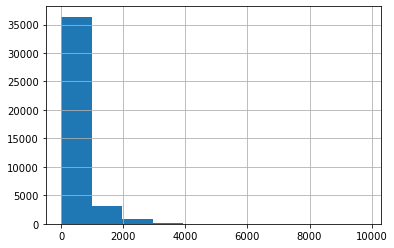

In [75]:
data.price_sf.hist()

In [76]:
data.nlargest(20, 'price_sf')
### First one, 109 N Water St. is legit, but might want to exclude anyway, because it's waterfront... not sure


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf
198800,for_sale,8650000.0,1.0,1.0,0.27,"109 N Water St, Edgartown, MA, 02539",109 N Water St,Edgartown,Massachusetts,2539.0,882.0,NaN,9807.256236
470821,for_sale,26500000.0,3.0,4.0,NaN,"15 Central Park W Apt 34C, New York, NY, 10023",15 Central Park W Apt 34C,New York City,New York,10023.0,2761.0,2008-01-28,9597.971749
465916,for_sale,66000000.0,4.0,6.0,NaN,"111 W 57th St Ph 72, New York, NY, 10019",111 W 57th St Ph 72,New York City,New York,10019.0,7130.0,NaN,9256.661992
477499,for_sale,16500000.0,8.0,8.0,NaN,"18 Mercer St, New York, NY, 10013",18 Mercer St,New York City,New York,10013.0,1785.0,NaN,9243.697479
486627,for_sale,62000000.0,5.0,6.0,NaN,"23 E 22nd St Unit Ph, New York City, NY, 10010",23 E 22nd St Unit Ph,New York City,New York,10010.0,6850.0,NaN,9051.094891
492006,for_sale,62000000.0,5.0,6.0,NaN,"23 E 22nd St Unit Ph, New York, NY, 10010",23 E 22nd St Unit Ph,New York City,New York,10010.0,6850.0,NaN,9051.094891
479936,for_sale,45000000.0,4.0,5.0,NaN,"30 Park Pl Ph 81, Manhattan, NY, 10007",30 Park Pl Ph 81,Manhattan,New York,10007.0,5443.0,2017-02-01,8267.499541
476721,for_sale,79000000.0,1.0,1.0,NaN,"2 Park Pl Unit Pinnacle, New York, NY, 10007",2 Park Pl Unit Pinnacle,New York City,New York,10007.0,9680.0,NaN,8161.157025
488671,for_sale,34000000.0,4.0,4.0,NaN,"217 W 57th St Apt 91E, New York, NY, 10019",217 W 57th St Apt 91E,New York City,New York,10019.0,4296.0,NaN,7914.338920
459320,for_sale,100000000.0,10.0,10.0,60.92,"19 Great Is, Darien, CT, 06820",19 Great Is,Darien,Connecticut,6820.0,13107.0,NaN,7629.510948


In [84]:
### Maybe now we could format zip codes correctly?? Does it matter much?

#data.zip_code.astype(str).str.zfill(5)

sum( pd.isna( data.zip_code ) ) ### Just 1, we can fix that... (or just drop it would be easiest)



1

In [85]:
data[pd.isna(data.zip_code)]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf
57236,for_sale,329000.0,5.0,2.0,0.08,"14 Elm St, Philmont, NY",14 Elm St,Philmont,New York,NaN,2496.0,NaN,131.810897


In [87]:
data = data[ ~pd.isna(data.zip_code) ]

In [91]:
data.zip_code.astype(int).astype(str).str.zfill(5)  ### Looks correct

24231     01001
24233     01001
24234     01001
24235     01001
24236     01001
          ...  
512034    11414
512109    11223
512111    11234
512139    11234
512155    11235
Name: zip_code, Length: 40556, dtype: object

In [92]:
data['zip_code'] = data.zip_code.astype(int).astype(str).str.zfill(5)

In [93]:
data.zip_code.value_counts()

11201    389
10011    254
06010    227
10013    212
06880    210
        ... 
01929      1
10708      1
08810      1
03445      1
05061      1
Name: zip_code, Length: 2171, dtype: int64

In [95]:
sum( pd.isna(data.acre_lot) ) ### Lots of NaN's, but maybe still keep

11082

<AxesSubplot:xlabel='acre_lot'>

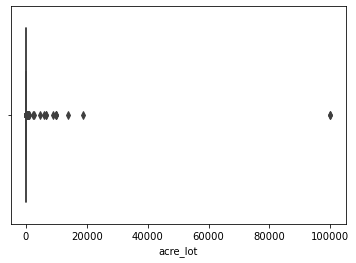

In [97]:
sns.boxplot( x=data.acre_lot )

In [98]:
data.nlargest(10, 'acre_lot') ### Looked up 2 Pike St. and it's a 0.40 acre lot, so this looks off.

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf
348494,for_sale,129000.0,2.0,1.0,100000.0,"2 Pike St, Whitehall, NY, 12887",2 Pike St,Whitehall,New York,12887,1352.0,NaN,95.414201
418716,for_sale,264900.0,3.0,2.0,99999.0,"4 Heritage Way Unit 4, Montville, CT, 06353",4 Heritage Way Unit 4,Montville,Connecticut,06353,1485.0,NaN,178.383838
221570,for_sale,250000.0,3.0,3.0,18817.0,"8 Sunset Rd, Narragansett, RI, 02882",8 Sunset Rd,Narragansett,Rhode Island,02882,1532.0,2020-09-14,163.185379
293450,for_sale,319000.0,3.0,1.0,13697.0,"56 Lower A St, Portland, ME, 04108",56 Lower A St,Portland,Maine,04108,992.0,NaN,321.572581
418713,for_sale,264900.0,2.0,2.0,9999.0,"2 Heritage Way Unit 2, Montville, CT, 06353",2 Heritage Way Unit 2,Montville,Connecticut,06353,1485.0,NaN,178.383838
461489,for_sale,1425000.0,3.0,4.0,9999.0,"1-B White Barns Ln, Norwalk, CT, 06851",1-B White Barns Ln,Norwalk,Connecticut,06851,3013.0,NaN,472.950548
461503,for_sale,1550000.0,3.0,4.0,9999.0,"13-B White Barns Ln, Norwalk, CT, 06851",13-B White Barns Ln,Norwalk,Connecticut,06851,3013.0,NaN,514.437438
55811,for_sale,425000.0,3.0,1.0,9035.0,"6 Old Cross Rd, Mount Washington, MA, 01258",6 Old Cross Rd,Mount Washington,Massachusetts,01258,1200.0,NaN,354.166667
57648,for_sale,39900.0,3.0,1.0,6680.0,"26 Water St, Hoosick Falls, NY, 12090",26 Water St,Hoosick Falls,New York,12090,1300.0,NaN,30.692308
497403,for_sale,469000.0,6.0,5.0,6517.0,"318 Manson Pl, Plainfield, NJ, 07063",318 Manson Pl,Plainfield,New Jersey,07063,3400.0,2021-01-11,137.941176


In [101]:
data = data[data.acre_lot < 99998]

In [102]:
data.nlargest(10, 'acre_lot')

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf
221570,for_sale,250000.0,3.0,3.0,18817.0,"8 Sunset Rd, Narragansett, RI, 02882",8 Sunset Rd,Narragansett,Rhode Island,02882,1532.0,2020-09-14,163.185379
293450,for_sale,319000.0,3.0,1.0,13697.0,"56 Lower A St, Portland, ME, 04108",56 Lower A St,Portland,Maine,04108,992.0,NaN,321.572581
418713,for_sale,264900.0,2.0,2.0,9999.0,"2 Heritage Way Unit 2, Montville, CT, 06353",2 Heritage Way Unit 2,Montville,Connecticut,06353,1485.0,NaN,178.383838
461489,for_sale,1425000.0,3.0,4.0,9999.0,"1-B White Barns Ln, Norwalk, CT, 06851",1-B White Barns Ln,Norwalk,Connecticut,06851,3013.0,NaN,472.950548
461503,for_sale,1550000.0,3.0,4.0,9999.0,"13-B White Barns Ln, Norwalk, CT, 06851",13-B White Barns Ln,Norwalk,Connecticut,06851,3013.0,NaN,514.437438
55811,for_sale,425000.0,3.0,1.0,9035.0,"6 Old Cross Rd, Mount Washington, MA, 01258",6 Old Cross Rd,Mount Washington,Massachusetts,01258,1200.0,NaN,354.166667
57648,for_sale,39900.0,3.0,1.0,6680.0,"26 Water St, Hoosick Falls, NY, 12090",26 Water St,Hoosick Falls,New York,12090,1300.0,NaN,30.692308
497403,for_sale,469000.0,6.0,5.0,6517.0,"318 Manson Pl, Plainfield, NJ, 07063",318 Manson Pl,Plainfield,New Jersey,07063,3400.0,2021-01-11,137.941176
501294,for_sale,539000.0,4.0,3.0,6076.0,"8 Kelly St, Metuchen, NJ, 08840",8 Kelly St,Metuchen,New Jersey,08840,1548.0,2018-10-16,348.191214
294769,for_sale,754000.0,5.0,3.0,4500.0,"11 Arcadia St, Portland, ME, 04103",11 Arcadia St,Portland,Maine,04103,2816.0,NaN,267.755682


In [105]:
### Those 9999's for acre_lot are probably erroneous, so let's nix those.

data = data[data.acre_lot != 9999]


In [109]:
sum( data.full_address.str.contains('apt', case=False) ) # 620

620

In [113]:
sum( data.full_address.str.contains('Apt') )  ### 605
sum( data.full_address.str.contains('apt') )  ### 15

605

In [114]:
sum( data.full_address.str.contains('unit', case=False) ) ### 1286

1286

In [115]:
data['prop_type'] = 'house'

In [118]:
data[data.full_address.str.contains('apt', case=False)].prop_type = 'apt'

/Users/michaelruston/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [120]:
data.loc[data.full_address.str.contains('apt', case=False),'prop_type'] = 'apt'

In [121]:
data.loc[data.full_address.str.contains('unit', case=False),'prop_type'] = 'apt'

In [122]:
data.prop_type.value_counts()

house    27565
apt       1904
Name: prop_type, dtype: int64

In [124]:
data.head()
data.tail(10)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf,prop_type
511751,for_sale,999999.0,5.0,3.0,0.05,"1249 Ryder St, Brooklyn, NY, 11234",1249 Ryder St,Brooklyn,New York,11234,2452.0,2007-09-12,407.829935,house
511821,for_sale,1575000.0,14.0,6.0,0.08,"2767 W 15th St, Brooklyn, NY, 11224",2767 W 15th St,Brooklyn,New York,11224,5400.0,NaN,291.666667,house
511828,for_sale,1980000.0,6.0,7.0,0.12,"20-21 Clintonville St, Whitestone, NY, 11357",20-21 Clintonville St,Whitestone,New York,11357,3120.0,NaN,634.615385,house
511893,for_sale,739900.0,2.0,3.0,0.07,"1416 E 53rd St, Brooklyn, NY, 11234",1416 E 53rd St,Brooklyn,New York,11234,1620.0,2007-05-31,456.728395,house
511970,for_sale,650000.0,3.0,2.0,0.05,"5119 Avenue J, Brooklyn, NY, 11234",5119 Avenue J,Brooklyn,New York,11234,1781.0,2009-11-09,364.963504,house
512002,for_sale,1699000.0,4.0,3.0,0.10,"146 Barlow Dr S, Brooklyn, NY, 11234",146 Barlow Dr S,Brooklyn,New York,11234,2600.0,2017-02-17,653.461538,house
512010,for_sale,499000.0,3.0,1.0,0.04,"48 Celeste Ct, Brooklyn, NY, 11229",48 Celeste Ct,Brooklyn,New York,11229,1280.0,2000-08-08,389.843750,house
512021,for_sale,1288000.0,4.0,4.0,0.05,"1824 Avenue W, Brooklyn, NY, 11229",1824 Avenue W,Brooklyn,New York,11229,2487.0,NaN,517.893044,house
512034,for_sale,1325000.0,4.0,3.0,0.11,"16204 84th St, Howard Beach, NY, 11414",16204 84th St,Howard Beach,New York,11414,2449.0,2019-10-10,541.037158,house
512109,for_sale,1200000.0,3.0,2.0,0.05,"1777 W 7th St, Brooklyn, NY, 11223",1777 W 7th St,Brooklyn,New York,11223,1400.0,1985-07-11,857.142857,house


In [125]:
data.loc[data.house_size<1000,]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf,prop_type
24231,for_sale,180000.0,2.0,1.0,0.34,"23 Moore St, Agawam, MA, 01001",23 Moore St,Agawam,Massachusetts,01001,676.0,NaN,266.272189,house
24315,for_sale,215000.0,1.0,1.0,0.31,"47 Poole Rd, Belchertown, MA, 01007",47 Poole Rd,Belchertown,Massachusetts,01007,640.0,2000-08-03,335.937500,house
24328,for_sale,65000.0,1.0,1.0,0.40,"29 Old Dana Rd, Barre, MA, 01005",29 Old Dana Rd,Barre,Massachusetts,01005,634.0,2003-10-28,102.523659,house
24340,for_sale,169999.0,2.0,1.0,0.60,"351 Bay Rd, Belchertown, MA, 01007",351 Bay Rd,Belchertown,Massachusetts,01007,802.0,2009-06-26,211.968828,house
24953,for_sale,110000.0,2.0,1.0,0.25,"87 River Rd, South Hadley, MA, 01075",87 River Rd,South Hadley,Massachusetts,01075,800.0,2004-07-06,137.500000,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510771,for_sale,535000.0,2.0,1.0,0.04,"5 Cyrus Ave, Brooklyn, NY, 11229",5 Cyrus Ave,Brooklyn,New York,11229,656.0,NaN,815.548780,house
510816,for_sale,368000.0,3.0,1.0,0.05,"16 Dunne Pl, Brooklyn, NY, 11235",16 Dunne Pl,Brooklyn,New York,11235,740.0,NaN,497.297297,house
510921,for_sale,1315000.0,1.0,1.0,6.71,"252 South St Unit 22K, New York City, NY, 10002",252 South St Unit 22K,New York City,New York,10002,695.0,NaN,1892.086331,apt
510993,for_sale,519000.0,1.0,1.0,0.59,"76-26 47th Ave Unit 3E, Elmhurst, NY, 11373",76-26 47th Ave Unit 3E,Elmhurst,New York,11373,710.0,2004-01-13,730.985915,apt


In [129]:
sum( pd.isna(data.sold_date) ) ### 13331

sum( ~pd.isna(data.sold_date)) ### 16138


16138

In [133]:
data.loc[data.prop_type=='apt','house_size'].mean()
data.loc[data.prop_type=='house','house_size'].mean()

2501.031888264103

In [132]:
data.groupby('prop_type')['house_size'].mean()

prop_type
apt      1681.777836
house    2501.031888
Name: house_size, dtype: float64

In [135]:
data.groupby('prop_type')['price'].mean()

data.groupby('prop_type')['price'].median()

prop_type
apt      599000.0
house    475000.0
Name: price, dtype: float64

In [138]:
#data.groupby( pd.isna(data.sold_date) )['price'].count()

data.groupby( pd.isna(data.sold_date) )['price'].median()

sold_date
False    475000.0
True     498000.0
Name: price, dtype: float64

In [140]:
data.groupby(['state','prop_type'])['price'].median()

state          prop_type
Connecticut    apt          795000.0
               house        389949.5
Maine          apt          450000.0
               house        325000.0
Massachusetts  apt          650000.0
               house        649000.0
New Hampshire  apt          650000.0
               house        429900.0
New Jersey     apt          349949.5
               house        499825.0
New York       apt          937500.0
               house        730000.0
Rhode Island   apt          600280.0
               house        409900.0
Vermont        apt          395000.0
               house        369450.0
Name: price, dtype: float64

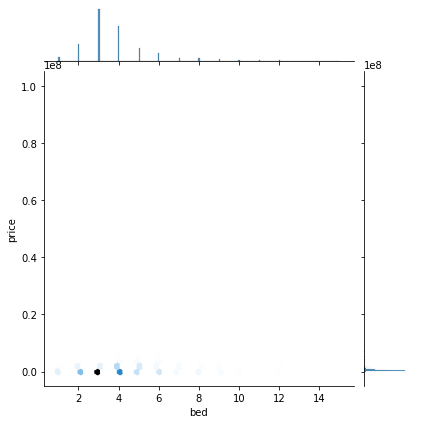

In [141]:
sns.jointplot(x='bed', y='price', kind="hex", data=data) ### looks like crap!

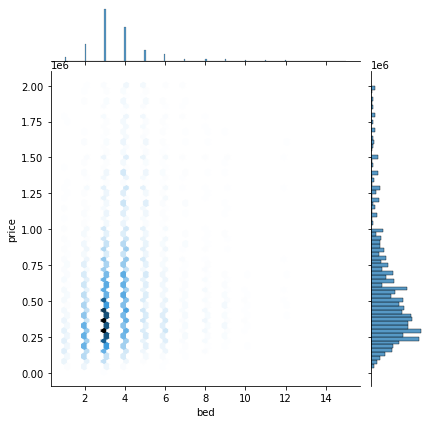

In [146]:
sns.jointplot(x='bed', y='price', kind="hex", data=data[data.price<2e6] )


In [148]:
min(data.price)  ### 9000

data['log_price'] = np.log(data.price)

In [149]:
data.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf,prop_type,log_price
24231,for_sale,180000.0,2.0,1.0,0.34,"23 Moore St, Agawam, MA, 01001",23 Moore St,Agawam,Massachusetts,01001,676.0,NaN,266.272189,house,12.100712
24236,for_sale,239900.0,3.0,1.0,0.46,"270 South St, Agawam, MA, 01001",270 South St,Agawam,Massachusetts,01001,1196.0,NaN,200.585284,house,12.387977
24237,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,01001,2314.0,2014-06-25,226.879862,house,13.171154
24238,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,01001,1276.0,2012-10-12,227.194357,house,12.577291
24241,for_sale,275000.0,4.0,2.0,0.11,"6-8 King Ave, Agawam, MA, 01001",6-8 King Ave,Agawam,Massachusetts,01001,1732.0,NaN,158.775982,house,12.524526


<AxesSubplot:xlabel='house_size', ylabel='Count'>

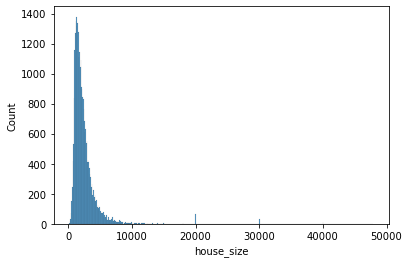

In [152]:
sns.histplot( data.house_size )

In [153]:
data.nlargest(20, 'house_size')

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf,prop_type,log_price
466015,for_sale,1398000.0,4.0,3.0,1.10,"150 Leroy St, Tenafly, NJ, 07670",150 Leroy St,Tenafly,New Jersey,07670,47916.0,NaN,29.176058,house,14.150553
472774,for_sale,699000.0,3.0,2.0,0.99,"20 Sherman Ave, Hawthorne, NJ, 07506",20 Sherman Ave,Hawthorne,New Jersey,07506,43359.0,NaN,16.121221,house,13.457406
468054,for_sale,638500.0,2.0,2.0,0.95,"460 Lafayette Ave, Wyckoff, NJ, 07481",460 Lafayette Ave,Wyckoff,New Jersey,07481,41182.0,NaN,15.504347,house,13.366877
466472,for_sale,699900.0,8.0,4.0,0.09,"5 Timothy St, Paterson, NJ, 07503",5 Timothy St,Paterson,New Jersey,07503,39996.0,NaN,17.499250,house,13.458693
471906,for_sale,600000.0,7.0,5.0,0.19,"447 New England Ter, City of Orange Township, ...",447 New England Ter,City of Orange Township,New Jersey,07050,39996.0,2018-01-24,15.001500,house,13.304685
473403,for_sale,649000.0,8.0,4.0,0.07,"290 21st St, Irvington, NJ, 07111",290 21st St,Irvington,New Jersey,07111,39996.0,2018-07-02,16.226623,house,13.383188
473421,for_sale,769000.0,10.0,4.0,0.14,"248 Conklin Ave, Hillside, NJ, 07205",248 Conklin Ave,Hillside,New Jersey,07205,39996.0,NaN,19.226923,house,13.552846
473458,for_sale,750000.0,10.0,4.0,0.20,"58-60 Lincoln Pl, Irvington, NJ, 07111",58-60 Lincoln Pl,Irvington,New Jersey,07111,39996.0,NaN,18.751875,house,13.527828
473655,for_sale,400000.0,8.0,4.0,0.06,"751 Springfield Ave, Irvington, NJ, 07111",751 Springfield Ave,Irvington,New Jersey,07111,39996.0,NaN,10.001000,house,12.899220
477827,for_sale,700000.0,8.0,4.0,0.21,"127 W 2nd Ave, Roselle, NJ, 07203",127 W 2nd Ave,Roselle,New Jersey,07203,39996.0,NaN,17.501750,house,13.458836


In [154]:
data[data.house_size > 15000 ]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf,prop_type,log_price
40599,for_sale,60000000.0,9.0,10.0,400.00,"450 Brickyard Rd, Woodstock, CT, 06281",450 Brickyard Rd,Woodstock,Connecticut,06281,18777.0,2003-08-28,3195.398626,house,17.909855
54611,for_sale,2150000.0,15.0,15.0,5.40,"279 W Park St, Lee, MA, 01238",279 W Park St,Lee,Massachusetts,01238,15885.0,1999-04-30,135.347812,house,14.580978
56664,for_sale,14995000.0,10.0,15.0,450.95,"400 5 1/2 Mile Rd, Cornwall, CT, 06753",400 5 1/2 Mile Rd,Cornwall,Connecticut,06753,18000.0,NaN,833.055556,house,16.523227
64244,for_sale,14000000.0,10.0,17.0,200.00,"3872-3874 Route 44, Millbrook, NY, 12545",3872-3874 Route 44,Millbrook,New York,12545,34000.0,NaN,411.764706,house,16.454568
64347,for_sale,2500000.0,2.0,4.0,178.85,"92-92 Rowe Rd, Milan, NY, 12571",92-92 Rowe Rd,Milan,New York,12571,28000.0,NaN,89.285714,house,14.731801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508946,for_sale,750000.0,2.0,5.0,0.07,"850 Lafayette St, Elizabeth City, NJ, 07201",850 Lafayette St,Elizabeth City,New Jersey,07201,19998.0,2013-10-31,37.503750,house,13.527828
508950,for_sale,750000.0,4.0,2.0,0.09,"32 Smith St, Elizabeth City, NJ, 07201",32 Smith St,Elizabeth City,New Jersey,07201,19998.0,2014-08-19,37.503750,house,13.527828
509075,for_sale,285000.0,4.0,2.0,0.06,"159 Virginia Ave, Jersey City, NJ, 07304",159 Virginia Ave,Jersey City,New Jersey,07304,19998.0,2019-07-12,14.251425,house,12.560244
509420,for_sale,419000.0,5.0,2.0,0.11,"332-334 South St, Elizabeth City, NJ, 07202",332-334 South St,Elizabeth City,New Jersey,07202,19998.0,NaN,20.952095,house,12.945626


In [155]:
data = data[data.house_size < 15000]

Text(0.5, 1.0, 'Histogram of house_size variable')

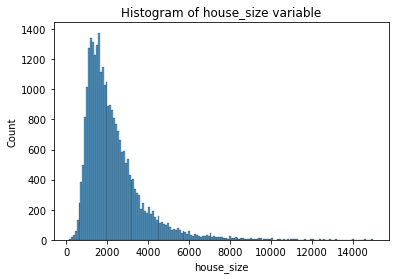

In [188]:
sns.histplot( data.house_size )
plt.title('Histogram of house_size variable')

In [157]:
data.head(10)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf,prop_type,log_price
24231,for_sale,180000.0,2.0,1.0,0.34,"23 Moore St, Agawam, MA, 01001",23 Moore St,Agawam,Massachusetts,01001,676.0,NaN,266.272189,house,12.100712
24236,for_sale,239900.0,3.0,1.0,0.46,"270 South St, Agawam, MA, 01001",270 South St,Agawam,Massachusetts,01001,1196.0,NaN,200.585284,house,12.387977
24237,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,01001,2314.0,2014-06-25,226.879862,house,13.171154
24238,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,01001,1276.0,2012-10-12,227.194357,house,12.577291
24241,for_sale,275000.0,4.0,2.0,0.11,"6-8 King Ave, Agawam, MA, 01001",6-8 King Ave,Agawam,Massachusetts,01001,1732.0,NaN,158.775982,house,12.524526
24242,for_sale,335000.0,6.0,2.0,0.24,"41-43 Ley St, Agawam, MA, 01001",41-43 Ley St,Agawam,Massachusetts,01001,1800.0,NaN,186.111111,house,12.721886
24244,for_sale,384900.0,3.0,2.0,0.46,"45 Hampden Ln, Agawam, MA, 01001",45 Hampden Ln,Agawam,Massachusetts,01001,1476.0,1986-11-20,260.772358,house,12.860739
24248,for_sale,779900.0,4.0,3.0,1.63,"251 Meadow St, Agawam, MA, 01001",251 Meadow St,Agawam,Massachusetts,01001,2910.0,NaN,268.006873,house,13.566921
24251,for_sale,199999.0,3.0,2.0,1.76,"88 South St, Agawam, MA, 01001",88 South St,Agawam,Massachusetts,01001,1968.0,2008-09-19,101.625508,house,12.206068
24258,for_sale,419000.0,4.0,2.0,2.00,"57 Amherst Rd, Pelham, MA, 01002",57 Amherst Rd,Pelham,Massachusetts,01002,1607.0,2005-07-25,260.734287,house,12.945626


<AxesSubplot:xlabel='bed', ylabel='Count'>

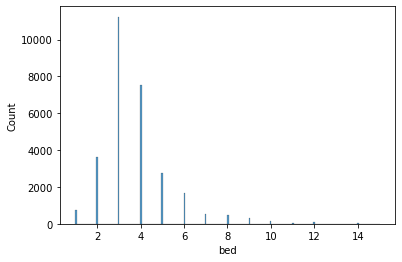

In [158]:
sns.histplot( data.bed )

<AxesSubplot:xlabel='bath', ylabel='Count'>

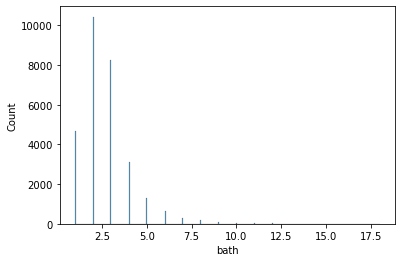

In [159]:
sns.histplot( data.bath )

In [ ]:
sns.histplot( data.acre_lot )

<AxesSubplot:>

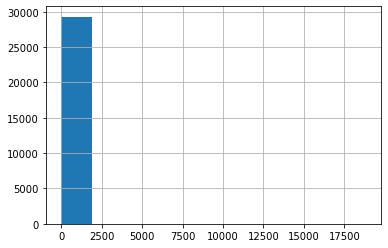

In [161]:
data.acre_lot.hist()

In [162]:
data.nlargest( 20, 'acre_lot')

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf,prop_type,log_price
221570,for_sale,250000.0,3.0,3.0,18817.00,"8 Sunset Rd, Narragansett, RI, 02882",8 Sunset Rd,Narragansett,Rhode Island,02882,1532.0,2020-09-14,163.185379,house,12.429216
293450,for_sale,319000.0,3.0,1.0,13697.00,"56 Lower A St, Portland, ME, 04108",56 Lower A St,Portland,Maine,04108,992.0,NaN,321.572581,house,12.672946
55811,for_sale,425000.0,3.0,1.0,9035.00,"6 Old Cross Rd, Mount Washington, MA, 01258",6 Old Cross Rd,Mount Washington,Massachusetts,01258,1200.0,NaN,354.166667,house,12.959844
57648,for_sale,39900.0,3.0,1.0,6680.00,"26 Water St, Hoosick Falls, NY, 12090",26 Water St,Hoosick Falls,New York,12090,1300.0,NaN,30.692308,house,10.594132
497403,for_sale,469000.0,6.0,5.0,6517.00,"318 Manson Pl, Plainfield, NJ, 07063",318 Manson Pl,Plainfield,New Jersey,07063,3400.0,2021-01-11,137.941176,house,13.058358
501294,for_sale,539000.0,4.0,3.0,6076.00,"8 Kelly St, Metuchen, NJ, 08840",8 Kelly St,Metuchen,New Jersey,08840,1548.0,2018-10-16,348.191214,house,13.197471
294769,for_sale,754000.0,5.0,3.0,4500.00,"11 Arcadia St, Portland, ME, 04103",11 Arcadia St,Portland,Maine,04103,2816.0,NaN,267.755682,house,13.533148
498145,for_sale,668000.0,3.0,3.0,2700.00,"321 Garretson Ave, Staten Island, NY, 10305",321 Garretson Ave,Staten Island,New York,10305,1440.0,1992-05-08,463.888889,house,13.412043
110404,for_sale,2750000.0,3.0,3.0,2295.68,"134 Arlington St, Boston, MA, 02116",134 Arlington St,Boston,Massachusetts,02116,1872.0,NaN,1469.017094,house,14.827111
461500,for_sale,1400000.0,3.0,4.0,999.00,"6-C White Barns Ln, Norwalk, CT, 06851",6-C White Barns Ln,Norwalk,Connecticut,06851,2964.0,NaN,472.334683,house,14.151983


<AxesSubplot:xlabel='acre_lot'>

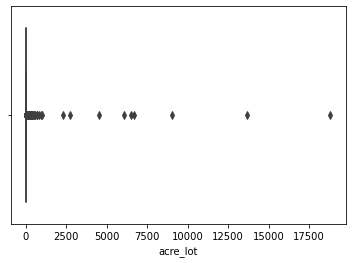

In [164]:
sns.boxplot( x=data.acre_lot )

In [165]:
data[data.acre_lot > 1000 ]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf,prop_type,log_price
55811,for_sale,425000.0,3.0,1.0,9035.00,"6 Old Cross Rd, Mount Washington, MA, 01258",6 Old Cross Rd,Mount Washington,Massachusetts,01258,1200.0,NaN,354.166667,house,12.959844
57648,for_sale,39900.0,3.0,1.0,6680.00,"26 Water St, Hoosick Falls, NY, 12090",26 Water St,Hoosick Falls,New York,12090,1300.0,NaN,30.692308,house,10.594132
110404,for_sale,2750000.0,3.0,3.0,2295.68,"134 Arlington St, Boston, MA, 02116",134 Arlington St,Boston,Massachusetts,02116,1872.0,NaN,1469.017094,house,14.827111
221570,for_sale,250000.0,3.0,3.0,18817.00,"8 Sunset Rd, Narragansett, RI, 02882",8 Sunset Rd,Narragansett,Rhode Island,02882,1532.0,2020-09-14,163.185379,house,12.429216
293450,for_sale,319000.0,3.0,1.0,13697.00,"56 Lower A St, Portland, ME, 04108",56 Lower A St,Portland,Maine,04108,992.0,NaN,321.572581,house,12.672946
294769,for_sale,754000.0,5.0,3.0,4500.00,"11 Arcadia St, Portland, ME, 04103",11 Arcadia St,Portland,Maine,04103,2816.0,NaN,267.755682,house,13.533148
497403,for_sale,469000.0,6.0,5.0,6517.00,"318 Manson Pl, Plainfield, NJ, 07063",318 Manson Pl,Plainfield,New Jersey,07063,3400.0,2021-01-11,137.941176,house,13.058358
498145,for_sale,668000.0,3.0,3.0,2700.00,"321 Garretson Ave, Staten Island, NY, 10305",321 Garretson Ave,Staten Island,New York,10305,1440.0,1992-05-08,463.888889,house,13.412043
501294,for_sale,539000.0,4.0,3.0,6076.00,"8 Kelly St, Metuchen, NJ, 08840",8 Kelly St,Metuchen,New Jersey,08840,1548.0,2018-10-16,348.191214,house,13.197471


<AxesSubplot:xlabel='price'>

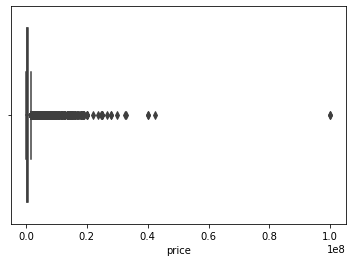

In [166]:
sns.boxplot( x=data.price )

<AxesSubplot:xlabel='log_price'>

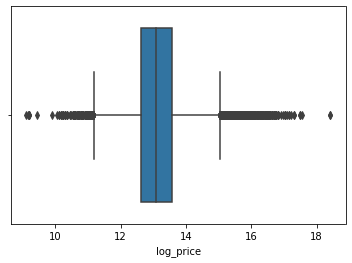

In [167]:
sns.boxplot( x=data.log_price )

<AxesSubplot:xlabel='house_size'>

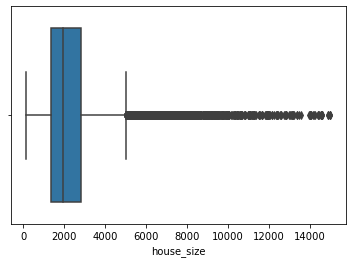

In [168]:
sns.boxplot( x=data.house_size )

<AxesSubplot:xlabel='house_size', ylabel='log_price'>

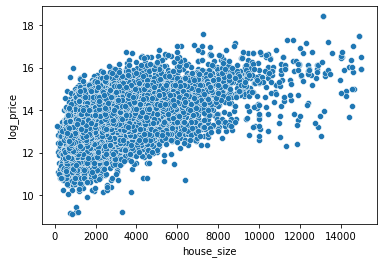

In [171]:
sns.scatterplot( x=data.house_size , y=data.log_price )

<AxesSubplot:xlabel='acre_lot', ylabel='log_price'>

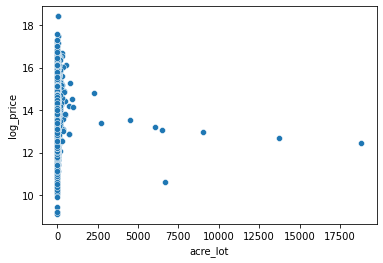

In [172]:
sns.scatterplot( x=data.acre_lot , y=data.log_price )

/Users/michaelruston/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='acre_lot'>

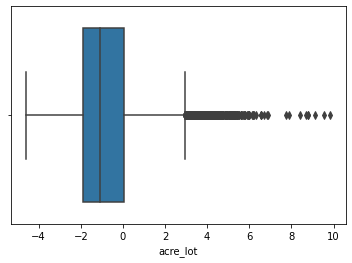

In [173]:
sns.boxplot( x=np.log(data.acre_lot) )

In [175]:
min(data.acre_lot)  ### 0

sum( data.acre_lot == 0 )


38

In [176]:
data[data.acre_lot == 0]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf,prop_type,log_price
80502,for_sale,379900.0,2.0,2.0,0.0,"91 Merrimack Meadows Ln Unit 91, Tewksbury, MA...",91 Merrimack Meadows Ln Unit 91,Tewksbury,Massachusetts,01876,1026.0,2020-04-28,370.272904,apt,12.847663
80678,for_sale,385000.0,2.0,1.0,0.0,"11 Merrimack Meadows Ln Unit 17, Tewksbury, MA...",11 Merrimack Meadows Ln Unit 17,Tewksbury,Massachusetts,01876,996.0,NaN,386.546185,apt,12.860999
81144,for_sale,419000.0,2.0,2.0,0.0,"1 Patrick Rd Unit 1, Tewksbury, MA, 01876",1 Patrick Rd Unit 1,Tewksbury,Massachusetts,01876,1240.0,2007-09-28,337.903226,apt,12.945626
94067,for_sale,290000.0,5.0,2.0,0.0,"20 Madison St, Providence, RI, 02907",20 Madison St,Providence,Rhode Island,02907,2680.0,2005-03-28,108.208955,house,12.577636
96692,for_sale,389900.0,3.0,1.0,0.0,"288 Narragansett Pkwy, Warwick, RI, 02888",288 Narragansett Pkwy,Warwick,Rhode Island,02888,1284.0,2016-01-25,303.660436,house,12.873646
103760,for_sale,369900.0,2.0,2.0,0.0,"17 Decarolis Dr Unit 17, Tewksbury, MA, 01876",17 Decarolis Dr Unit 17,Tewksbury,Massachusetts,01876,1023.0,2006-08-24,361.583578,apt,12.820988
104186,for_sale,419900.0,2.0,2.0,0.0,"5 Patrick Rd Unit 5, Tewksbury, MA, 01876",5 Patrick Rd Unit 5,Tewksbury,Massachusetts,01876,1240.0,1998-05-28,338.629032,apt,12.947772
104853,for_sale,379900.0,2.0,2.0,0.0,"100 Pleasant St Unit 3, Tewksbury, MA, 01876",100 Pleasant St Unit 3,Tewksbury,Massachusetts,01876,1469.0,2018-08-31,258.611300,apt,12.847663
211481,for_sale,499000.0,3.0,2.0,0.0,"2550 E Main Rd, Portsmouth, RI, 02871",2550 E Main Rd,Portsmouth,Rhode Island,02871,1312.0,2020-10-05,380.335366,house,13.120361
224869,for_sale,579900.0,2.0,2.0,0.0,"53 Stonebridge Ln Unit 28, Warwick, RI, 02818",53 Stonebridge Ln Unit 28,Warwick,Rhode Island,02818,1700.0,NaN,341.117647,apt,13.270611


In [177]:
sum( pd.isna(data.acre_lot) )  ### None, 0, interesting...

0

In [179]:
min( data.acre_lot[data.acre_lot>0] )  ### 0.01...

0.01

In [180]:
data[data.acre_lot == 0.01 ]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sf,prop_type,log_price
54279,for_sale,549000.0,3.0,2.0,0.01,"5 Benton Ave, Great Barrington, MA, 01230",5 Benton Ave,Great Barrington,Massachusetts,01230,1464.0,2012-10-12,375.000000,house,13.215854
73181,for_sale,499000.0,2.0,3.0,0.01,"55 Riley Rd Unit 43, Lunenburg, MA, 01462",55 Riley Rd Unit 43,Lunenburg,Massachusetts,01462,1644.0,NaN,303.527981,apt,13.120361
73351,for_sale,524900.0,2.0,2.0,0.01,"5 Arbor Dr Unit 5, Dracut, MA, 01826",5 Arbor Dr Unit 5,Dracut,Massachusetts,01826,1532.0,2001-09-18,342.624021,apt,13.170963
81890,for_sale,190000.0,2.0,2.0,0.01,"94 Mill St Apt 102, Woonsocket, RI, 02895",94 Mill St Apt 102,Woonsocket,Rhode Island,02895,968.0,2009-08-04,196.280992,apt,12.154779
96094,for_sale,369900.0,3.0,2.0,0.01,"48 Ferncrest Blvd, North Providence, RI, 02911",48 Ferncrest Blvd,North Providence,Rhode Island,02911,1520.0,2009-05-01,243.355263,house,12.820988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501295,for_sale,249900.0,2.0,1.0,0.01,"2 Connecticut Ct Unit 882, Old Bridge, NJ, 07747",2 Connecticut Ct Unit 882,Old Bridge,New Jersey,07747,949.0,1996-08-13,263.329821,apt,12.428816
501469,for_sale,259990.0,2.0,2.0,0.01,"926 Cedar Ct Unit 926, New Brunswick, NJ, 08901",926 Cedar Ct Unit 926,New Brunswick,New Jersey,08901,1181.0,2008-12-15,220.143946,apt,12.468398
501970,for_sale,230000.0,1.0,1.0,0.01,"416 68th St Apt 8, Guttenberg, NJ, 07093",416 68th St Apt 8,Guttenberg,New Jersey,07093,806.0,1993-08-31,285.359801,apt,12.345835
502233,for_sale,299900.0,2.0,2.0,0.01,"218 Regency Pl, Woodbridge Proper, NJ, 07095",218 Regency Pl,Woodbridge Proper,New Jersey,07095,1535.0,2022-02-08,195.374593,house,12.611204


In [182]:
### Judgement call, let's replace the zeros with 0.01 instead...

data.loc[data.acre_lot==0,'acre_lot'] = 0.01

<AxesSubplot:xlabel='acre_lot'>

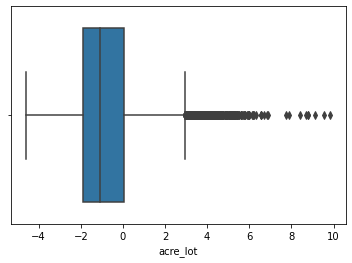

In [183]:
sns.boxplot( x=np.log(data.acre_lot) )

<AxesSubplot:xlabel='acre_lot', ylabel='log_price'>

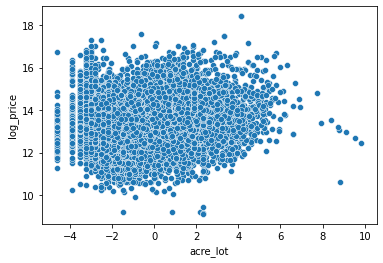

In [184]:
sns.scatterplot( x=np.log(data.acre_lot) , y=data.log_price )  ### slight upward trend relationship

In [185]:
### Let's write back out to CSV!

data.to_csv('realtor-data-after-EDA.csv')